# Churn Prediction Project using CRISP-DM Methodology

**Objective**: Predict customer churn to implement proactive retention strategies and improve customer loyalty.

## 1. Business Understanding
   - **Objective**: Gain a clear understanding of the project objectives and requirements from a business perspective.
   - **Tasks**:
     - Define the business problem: High customer churn rates lead to revenue loss.
     - Identify project goals: Develop a model to predict which customers are likely to churn.
     - Assess the situation: Review existing processes, resources, and constraints.
     - Define success criteria: Accuracy, precision, recall, and other relevant metrics.

## 2. Data Understanding
   - **Objective**: Collect and explore the data to become familiar with it and identify any data quality issues.
   - **Tasks**:
     - Data collection: Gather data from various sources such as transaction records, customer service interactions, and user behavior logs.
     - Data exploration: Perform exploratory data analysis (EDA) to understand data distributions, identify patterns, and detect anomalies.
     - Data visualization: Use visualizations to identify trends, correlations, and potential predictors of churn.
     - Data quality assessment: Identify and document any missing values, inconsistencies, and outliers.

## 3. Data Preparation
   - **Objective**: Prepare the data for modeling by cleaning and transforming it into a suitable format.
   - **Tasks**:
     - Data cleaning: Handle missing values, correct inconsistencies, and remove duplicates.
     - Feature selection: Identify relevant features that contribute to churn prediction.
     - Feature engineering: Create new features based on domain knowledge (e.g., customer tenure, average transaction value).
     - Data transformation: Normalize or standardize data, encode categorical variables, and split data into training and test sets.

## 4. Modeling
   - **Objective**: Develop predictive models to identify customers likely to churn.
   - **Tasks**:
     - Model selection: Choose appropriate algorithms (e.g., logistic regression, decision trees, random forest, neural networks).
     - Model training: Train models using the prepared data and fine-tune hyperparameters.
     - Model evaluation: Use cross-validation to evaluate model performance and avoid overfitting.
     - Model comparison: Compare different models based on performance metrics and select the best one.

## 5. Evaluation
   - **Objective**: Assess the performance of the selected model to ensure it meets business objectives.
   - **Tasks**:
     - Performance metrics: Evaluate the model using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.
     - Business evaluation: Ensure the model's predictions align with business goals and provide actionable insights.
     - Validation: Perform additional validation using a holdout sample or external data if available.
     - Documentation: Document the evaluation results and any limitations or assumptions.

## 6. Deployment
   - **Objective**: Implement the predictive model into the production environment and monitor its performance.
   - **Tasks**:
     - Deployment planning: Develop a deployment strategy, including integration with existing systems.
     - Model implementation: Work with engineers to deploy the model in a live environment.
     - Monitoring: Continuously monitor model performance and retrain as needed.
     - Maintenance: Update the model based on new data and evolving business requirements.


# Business Data Understanding

## Business Goals

The primary goal of this project is to increase the company's profit by reducing customer churn. To achieve this, we will develop a predictive model to identify customers who are likely to churn. By targeting these customers with specific marketing and promotional strategies, we aim to retain them and reduce churn rates.

## Strategy

1. **Predictive Modeling**: Create a robust predictive model to accurately identify customers who are at risk of churning.
2. **Targeted Marketing**: Develop and deploy targeted marketing campaigns and promotions to engage customers who are predicted to churn.
3. **Cost-Benefit Analysis**: Ensure that the projected cost of the marketing and retention efforts is lower than the projected profit gained from retaining these customers.

By focusing on these strategies, we aim to enhance customer retention and increase overall profitability for the bank.


# Data Understanding
## Data Description

This dataset contains information about customers of a bank, with various features that might influence their decision to leave the bank (churn). Below is a brief description of each feature in the dataset:

- **RowNumber**: Corresponds to the record (row) number and has no effect on the output.
- **CustomerId**: Contains random values and has no effect on customer leaving the bank.
- **Surname**: The surname of a customer has no impact on their decision to leave the bank.
- **CreditScore**: Can have an effect on customer churn, as customers with higher credit scores are less likely to leave the bank.
- **Geography**: A customer’s location can affect their decision to leave the bank.
- **Gender**: It’s interesting to explore whether gender plays a role in a customer leaving the bank.
- **Age**: This is certainly relevant, as older customers are less likely to leave their bank than younger ones.
- **Tenure**: Refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- **Balance**: A very good indicator of customer churn, as people with higher balances in their accounts are less likely to leave the bank compared to those with lower balances.
- **NumOfProducts**: Refers to the number of products that a customer has purchased through the bank.
- **HasCrCard**: Denotes whether or not a customer has a credit card. This column is relevant, as people with a credit card are less likely to leave the bank.
- **IsActiveMember**: Active customers are less likely to leave the bank.
- **EstimatedSalary**: As with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- **Exited**: Whether or not the customer left the bank.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [44]:
df = pd.read_csv('/kaggle/input/churn-modelling/Churn_Modelling.csv')

### General Overview of the Data

In [45]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [46]:
# Simplifying column names and bringing consistency
df.columns = [name.lower() for name in list(df.columns)]
df.drop(['rownumber','customerid','surname'],axis=1,inplace=True)
df.rename(columns={"exited": "churn"}, inplace=True)


In [47]:
df.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### a. Data Types and Missing Values

In [48]:
# Checking the missing values
df.isnull().sum()

creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
churn              0
dtype: int64

Each column has a count of 0 for missing values, indicating that our dataset is complete. This is advantageous as it allows us to proceed with the analysis and modeling without the need for imputation or data cleaning steps related to missing values.

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   geography        10000 non-null  object 
 2   gender           10000 non-null  object 
 3   age              10000 non-null  int64  
 4   tenure           10000 non-null  int64  
 5   balance          10000 non-null  float64
 6   numofproducts    10000 non-null  int64  
 7   hascrcard        10000 non-null  int64  
 8   isactivemember   10000 non-null  int64  
 9   estimatedsalary  10000 non-null  float64
 10  churn            10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


All columns in the dataset have been assigned appropriate data types based on their content and intended use. Since there are no discrepancies in data types and all columns contain valid data types for their respective contents, we can confidently proceed with further data analysis and model development tasks.

### b. Basic Descriptive Statistics

In [50]:
df.describe()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000




- **Credit Score Distribution**:
  - The average credit score is 650.53, with a standard deviation of 96.65, indicating a wide range of credit scores among the customers.
  - The minimum credit score is 350, and the maximum is 850, showing the spectrum from poor to excellent credit scores.

- **Age and Tenure**:
  - The average age of customers is 38.92 years, with a standard deviation of 10.49 years.
  - The average tenure with the bank is approximately 5 years, with a standard deviation of 2.89 years.

- **Balance and Products**:
  - The average balance in customer accounts is $76,485.89.
  - The number of products held by customers averages 1.53, with most customers having between 1 and 2 products.

- **Customer Activity and Churn**:
  - About 70.55% of customers have a credit card, and 51.51% are active members.
  - The churn rate is 20.37%, meaning about 1 in 5 customers leave the bank.


### Univariate Analysis

In [51]:
df['churn'].value_counts()/len(df['churn'])

churn
0    0.7963
1    0.2037
Name: count, dtype: float64

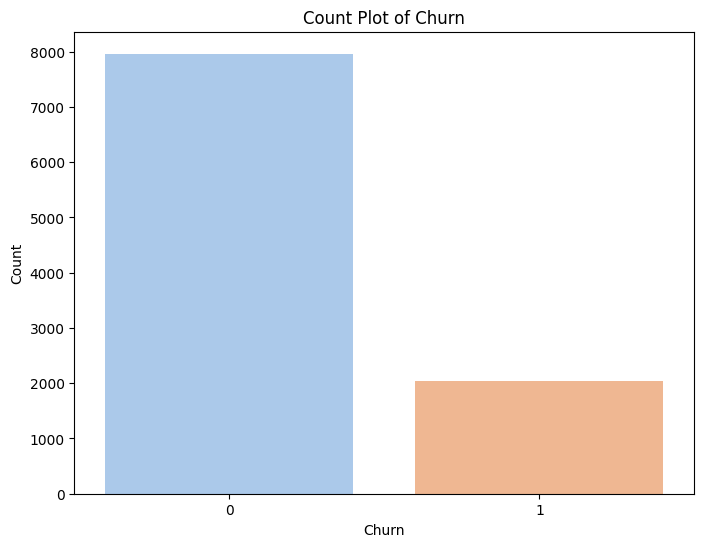

In [52]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='churn',palette='pastel')
plt.title('Count Plot of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

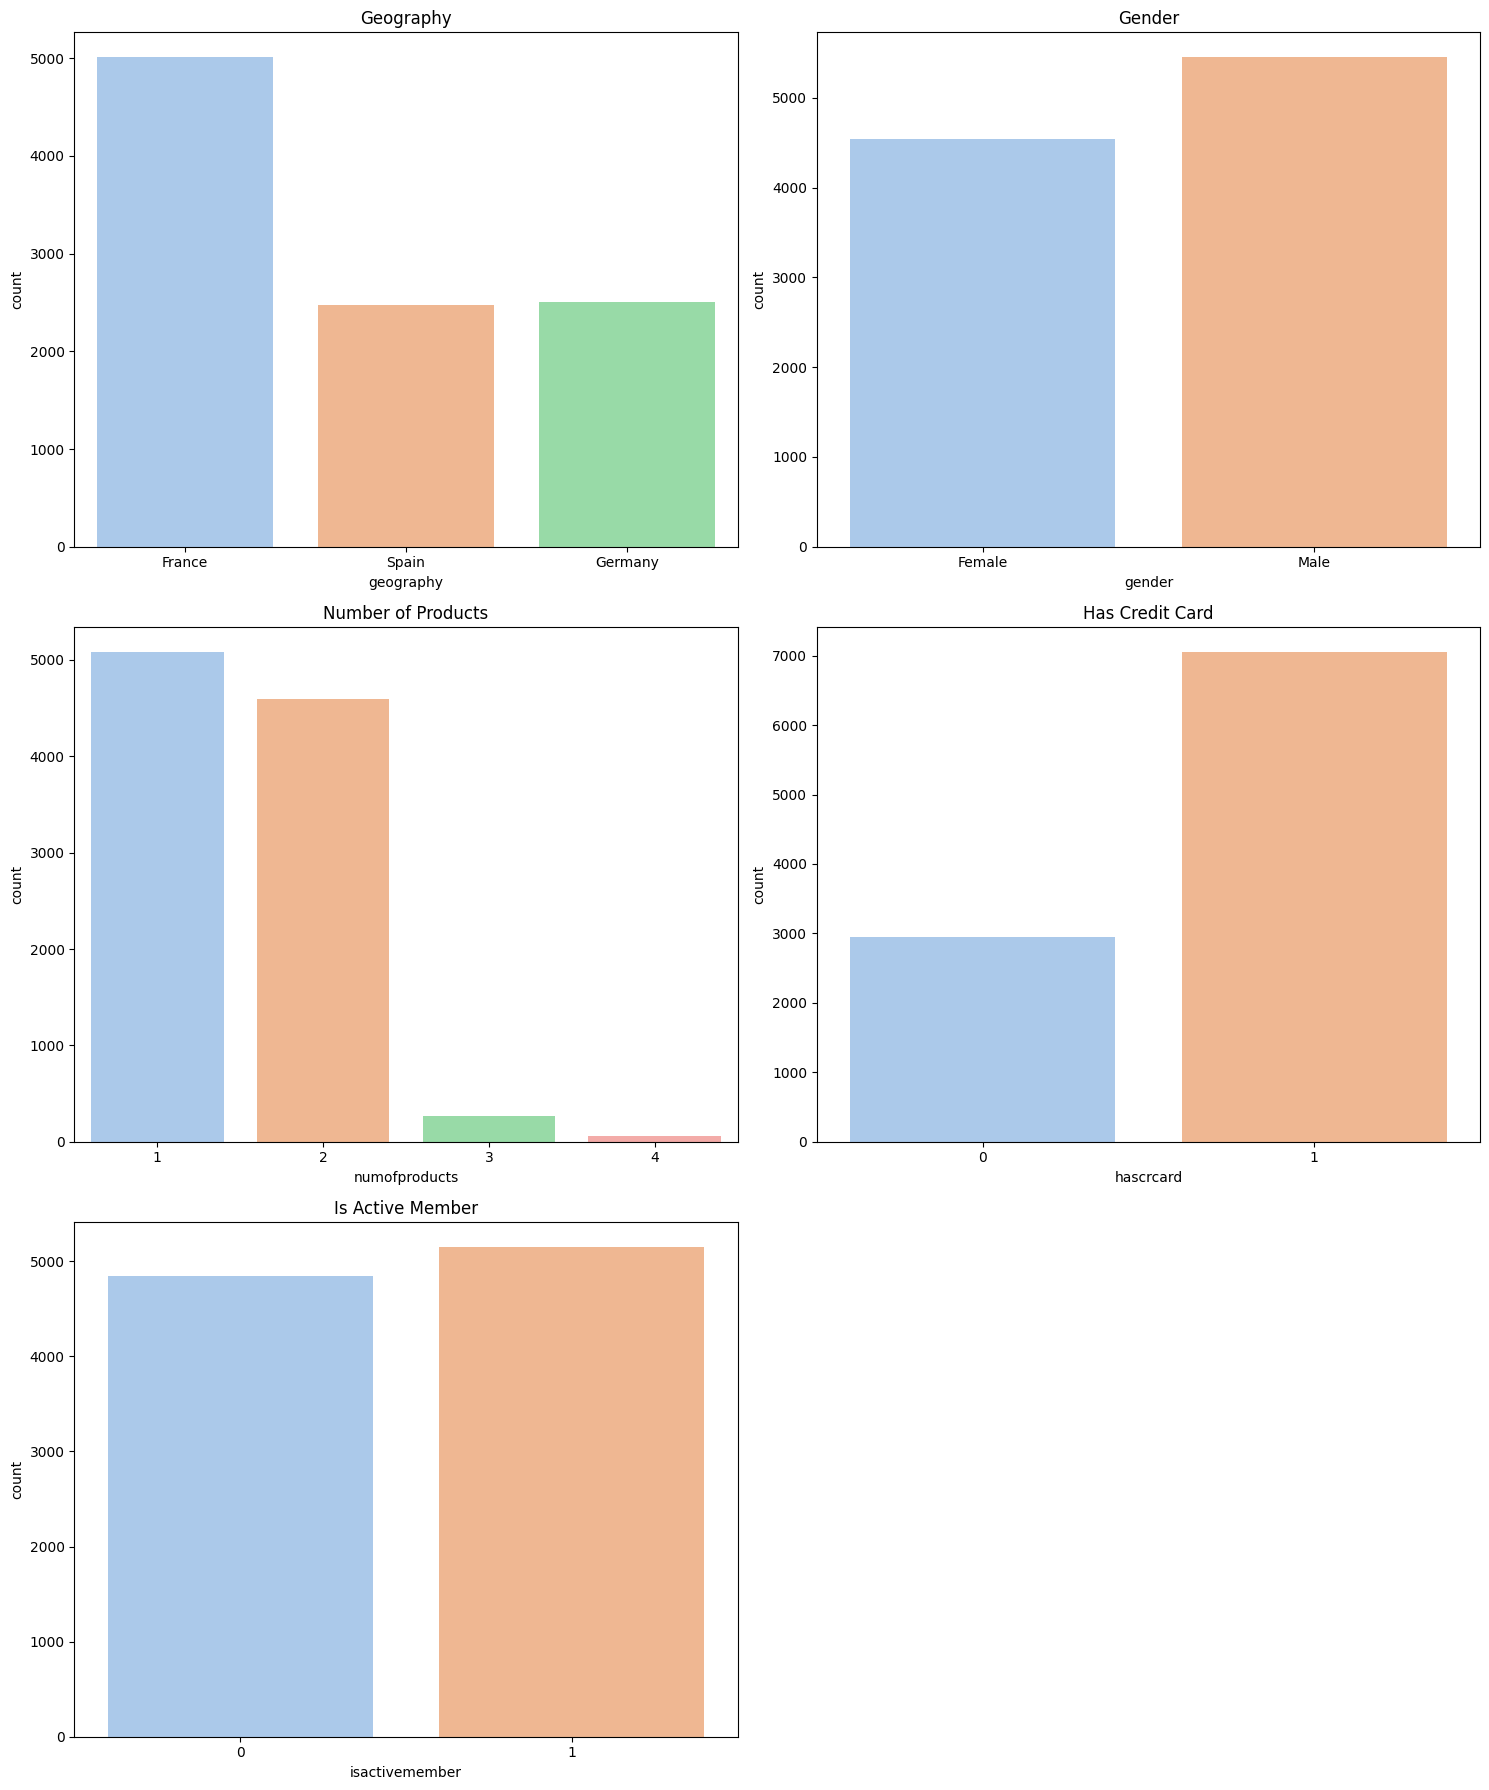

In [53]:
# Creating subplots in a 2-column layout
fig, axs = plt.subplots(3, 2, figsize=(15, 18))

# Geography
sns.countplot(x='geography', data=df, ax=axs[0, 0], palette='pastel')
axs[0, 0].set_title('Geography')

# Gender
sns.countplot(x='gender', data=df, ax=axs[0, 1], palette='pastel')
axs[0, 1].set_title('Gender')

# Number of Products
sns.countplot(x='numofproducts', data=df, ax=axs[1, 0], palette='pastel')
axs[1, 0].set_title('Number of Products')

# Has Credit Card
sns.countplot(x='hascrcard', data=df, ax=axs[1, 1], palette='pastel')
axs[1, 1].set_title('Has Credit Card')

# Is Active Member
sns.countplot(x='isactivemember', data=df, ax=axs[2, 0], palette='pastel')
axs[2, 0].set_title('Is Active Member')

# Removing the empty subplot (bottom right)
fig.delaxes(axs[2, 1])

# Display the plots
plt.tight_layout()
plt.show()

##### Geography
- **France**: The largest number of customers are from France, indicating a significant customer base in this country.
- **Spain and Germany**: The number of spain and germany customers is roughly equal, suggesting a balanced geography distribution among the customers.

##### Gender
- **Male and Female**: The number of male and female customers is roughly equal, suggesting a balanced gender distribution among the customers.

##### Number of Products
- **1 Product**: Most customers have only one product.
- **2 Products**: A significant portion of customers have two products, making this the second most common category.
- **3 and 4 Products**: Very few customers have three or four products, indicating that most customers do not have multiple products with the bank.

##### Has Credit Card
- **No Credit Card**: A substantial number of customers do not have a credit card.
- **Has Credit Card**: The majority of customers have a credit card, suggesting that credit card ownership is common among the customer base.

##### Is Active Member
- **Active and Inactive Member**: The number of active and inactive members is roughly equal, suggesting a balanced member type distribution among the customers.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


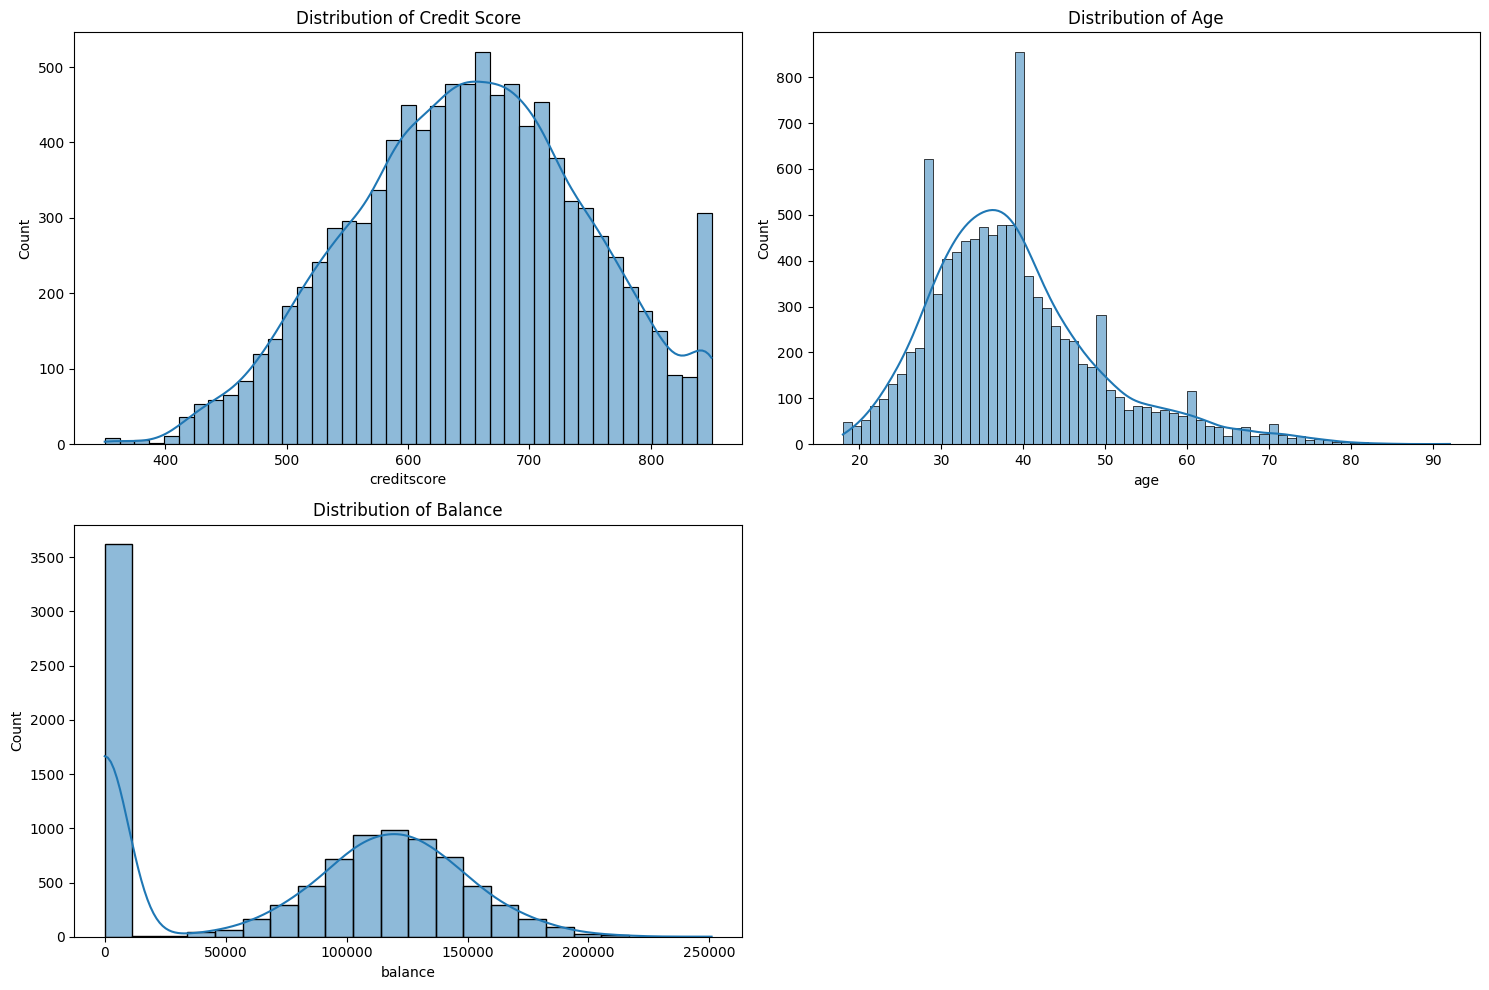

In [54]:
# Creating subplots in a 2-column layout
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Distribution of CreditScore
sns.histplot(df['creditscore'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Credit Score')

# Distribution of Age
sns.histplot(df['age'], kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Age')

# Distribution of Balance
sns.histplot(df['balance'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Balance')

# Removing the empty subplot (bottom right)
fig.delaxes(axs[1, 1])

# Display the plots
plt.tight_layout()
plt.show()



##### Distribution of Credit Score
- The distribution of credit scores appears to be approximately normal with a slight skew towards higher scores.
- The majority of credit scores lie between 500 and 800, with the peak around 650-700.
- There are very few customers with credit scores below 400 or above 850, indicating that most customers have moderate to good credit scores.

##### Distribution of Age
- The age distribution shows a concentration of customers in their 30s and 40s.
- There are notable peaks around the ages of 30 and 40, possibly indicating key age groups that the bank serves.
- There is a gradual decline in the number of customers as age increases beyond 50, with very few customers over the age of 70.

##### Distribution of Balance
- The balance distribution is heavily right-skewed, with a large number of customers having a balance close to zero.
- There are significant peaks around $100,000  and $150,000, indicating common balance ranges among the customers.
- A substantial number of customers have very high balances, but these are fewer in number compared to those with lower balances.


### Bivariate Analysis

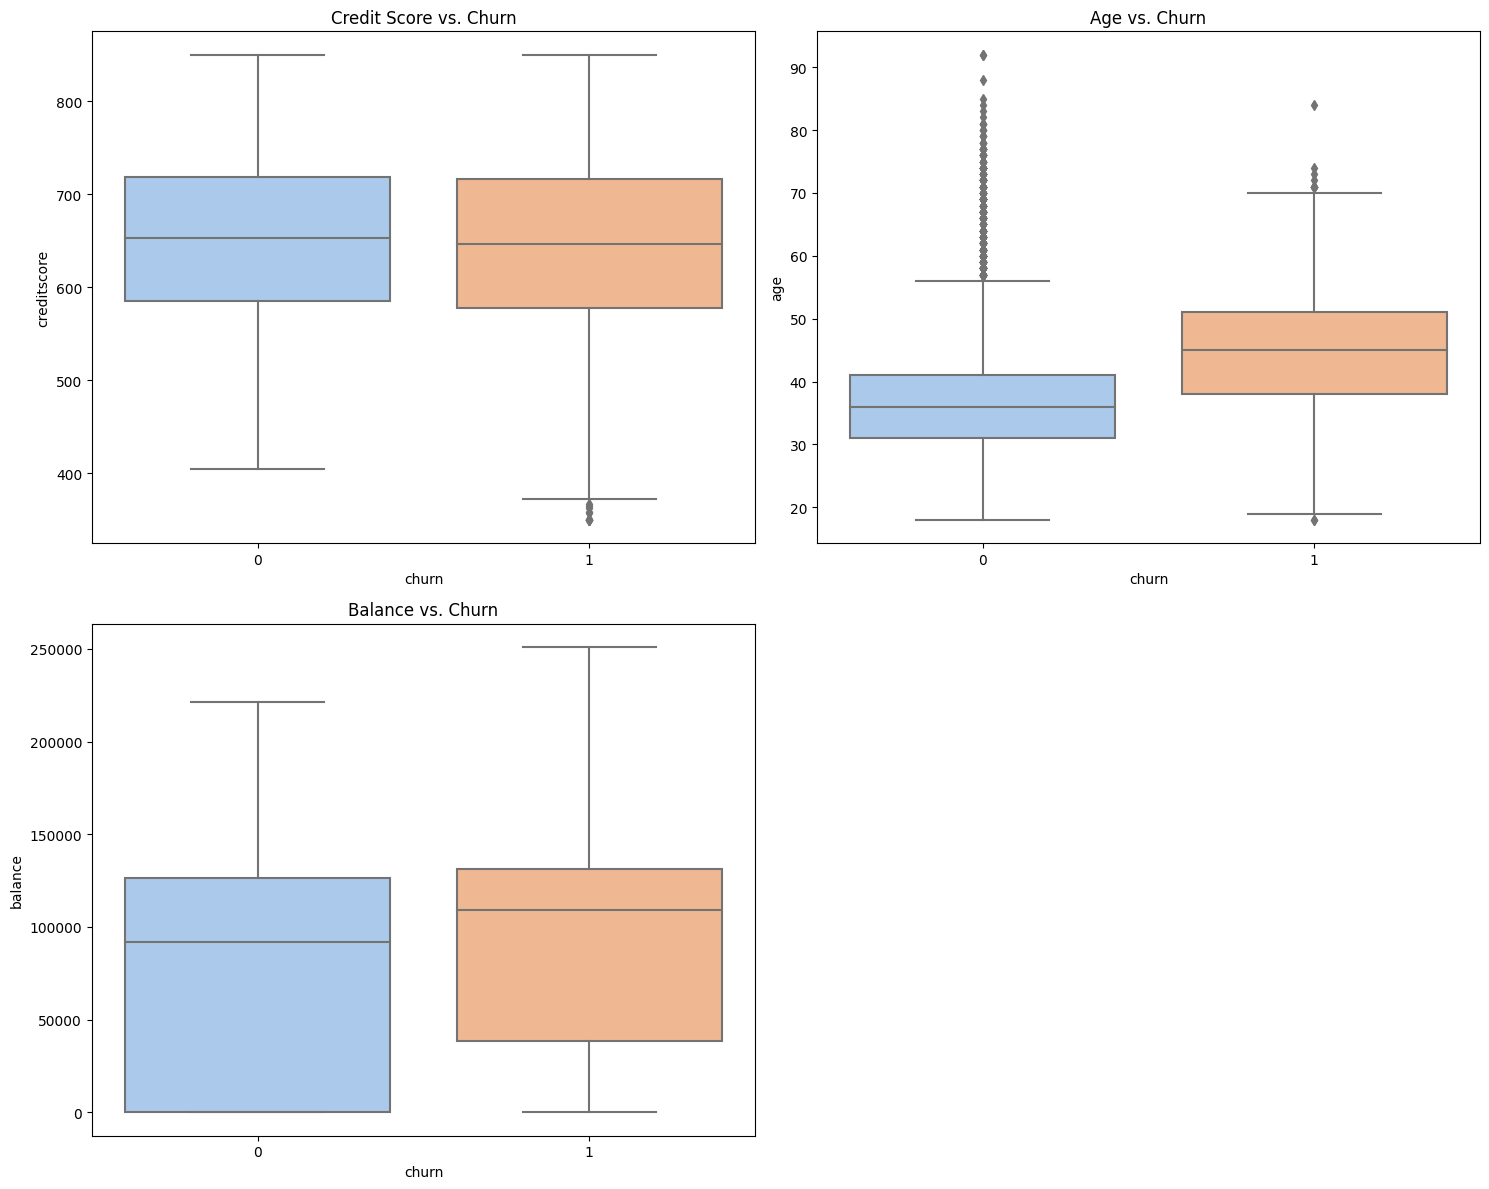

In [55]:
# Creating subplots in a 2-column layout
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Credit Score vs. Churn
sns.boxplot(x='churn', y='creditscore', data=df, ax=axs[0, 0],palette='pastel')
axs[0, 0].set_title('Credit Score vs. Churn')

# Age vs. Churn
sns.boxplot(x='churn', y='age', data=df, ax=axs[0, 1],palette='pastel')
axs[0, 1].set_title('Age vs. Churn')

# Balance vs. Churn
sns.boxplot(x='churn', y='balance', data=df, ax=axs[1, 0],palette='pastel')
axs[1, 0].set_title('Balance vs. Churn')

# Removing the empty subplot (bottom right)
fig.delaxes(axs[1, 1])

# Display the plots
plt.tight_layout()
plt.show()

# Insights from Box Plots of Credit Score, Age, Balance vs. Churn

##### Credit Score vs. Churn
- There is considerable overlap in the interquartile ranges of both groups, suggesting that credit score alone may not be a strong indicator of churn.
- The spread of credit scores is similar for both groups, but there are more outliers with lower credit scores in the non-churn group.

##### Age vs. Churn
- The median age of customers who churn is higher compared to those who do not churn.
- The interquartile range for both groups shows a significant overlap, but there are more older customers in the churn group, indicating that age could be a contributing factor.
- There are more outliers on the higher age side for the not churn group.

##### Balance vs. Churn
- The median balance is higher for customers who churn compared to those who do not churn.
- There is a significant overlap in the interquartile ranges, but the churn group has a higher range of balances.
- Customers with very high balances are more represented in the churn group, indicating that higher balances may be associated with a higher likelihood of churn.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

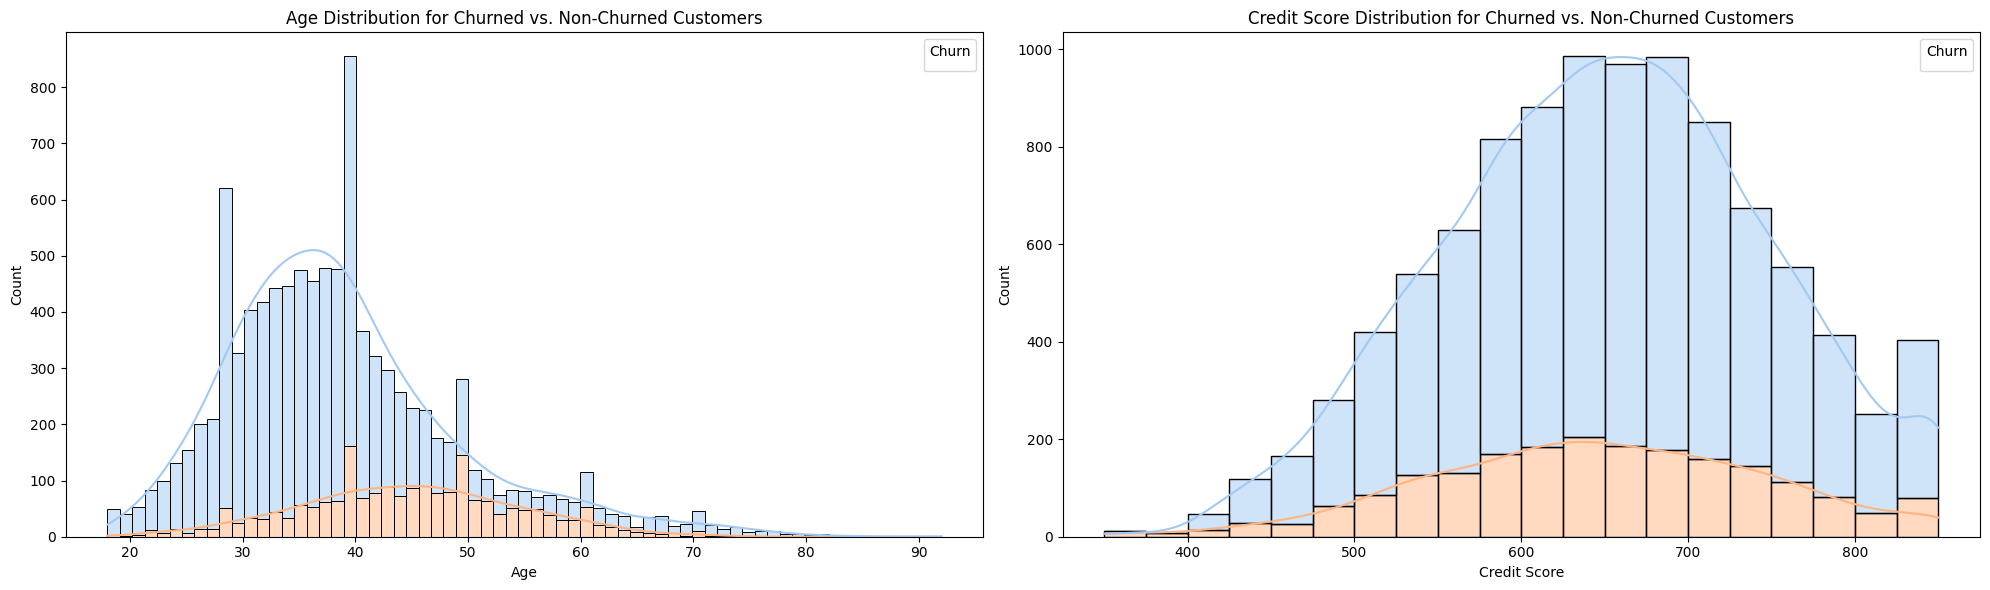

In [56]:
# Create subplots with 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Plot 1: Age Distribution for Churned vs. Non-Churned Customers
sns.histplot(data=df, x='age', hue='churn', multiple='stack', palette='pastel', kde=True, ax=axes[0])
axes[0].set_title('Age Distribution for Churned vs. Non-Churned Customers')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
axes[0].legend(title='Churn', loc='upper right')

# Plot 2: Credit Score Distribution for Churned vs. Non-Churned Customers
sns.histplot(data=df, x='creditscore', hue='churn', multiple='stack', palette='pastel', kde=True, binwidth=25, ax=axes[1])
axes[1].set_title('Credit Score Distribution for Churned vs. Non-Churned Customers')
axes[1].set_xlabel('Credit Score')
axes[1].set_ylabel('Count')
axes[1].legend(title='Churn', loc='upper right')

# Adjust layout
plt.tight_layout()
plt.show()

#### Age Distribution for Churned vs. Non-Churned Customers

- **Age Range 40-65**: 
  - There is a noticeable increase in the churn rate among customers aged between 40 and 65.
  - The distribution shows that a significant number of customers in this age range have churned compared to younger and older age groups.

- **Overall Trend**:
  - Younger customers (under 40) and older customers (over 65) have lower churn rates.
  - The highest churn rates are observed in the 40-50 age group.

#### Credit Score Distribution for Churned vs. Non-Churned Customers

- **Credit Score Below 450**:
  - Customers with a credit score below 450 have a higher churn rate.
  - The distribution shows a distinct separation, with churned customers (orange) making up a larger proportion of the population with low credit scores.

- **Overall Trend**:
  - As the credit score increases, the proportion of churned customers decreases.
  - Non-churned customers (blue) dominate the higher credit score ranges.

These insights can be crucial for developing targeted strategies to reduce customer churn by focusing on specific age groups and credit score ranges.


### Categorical Analysis

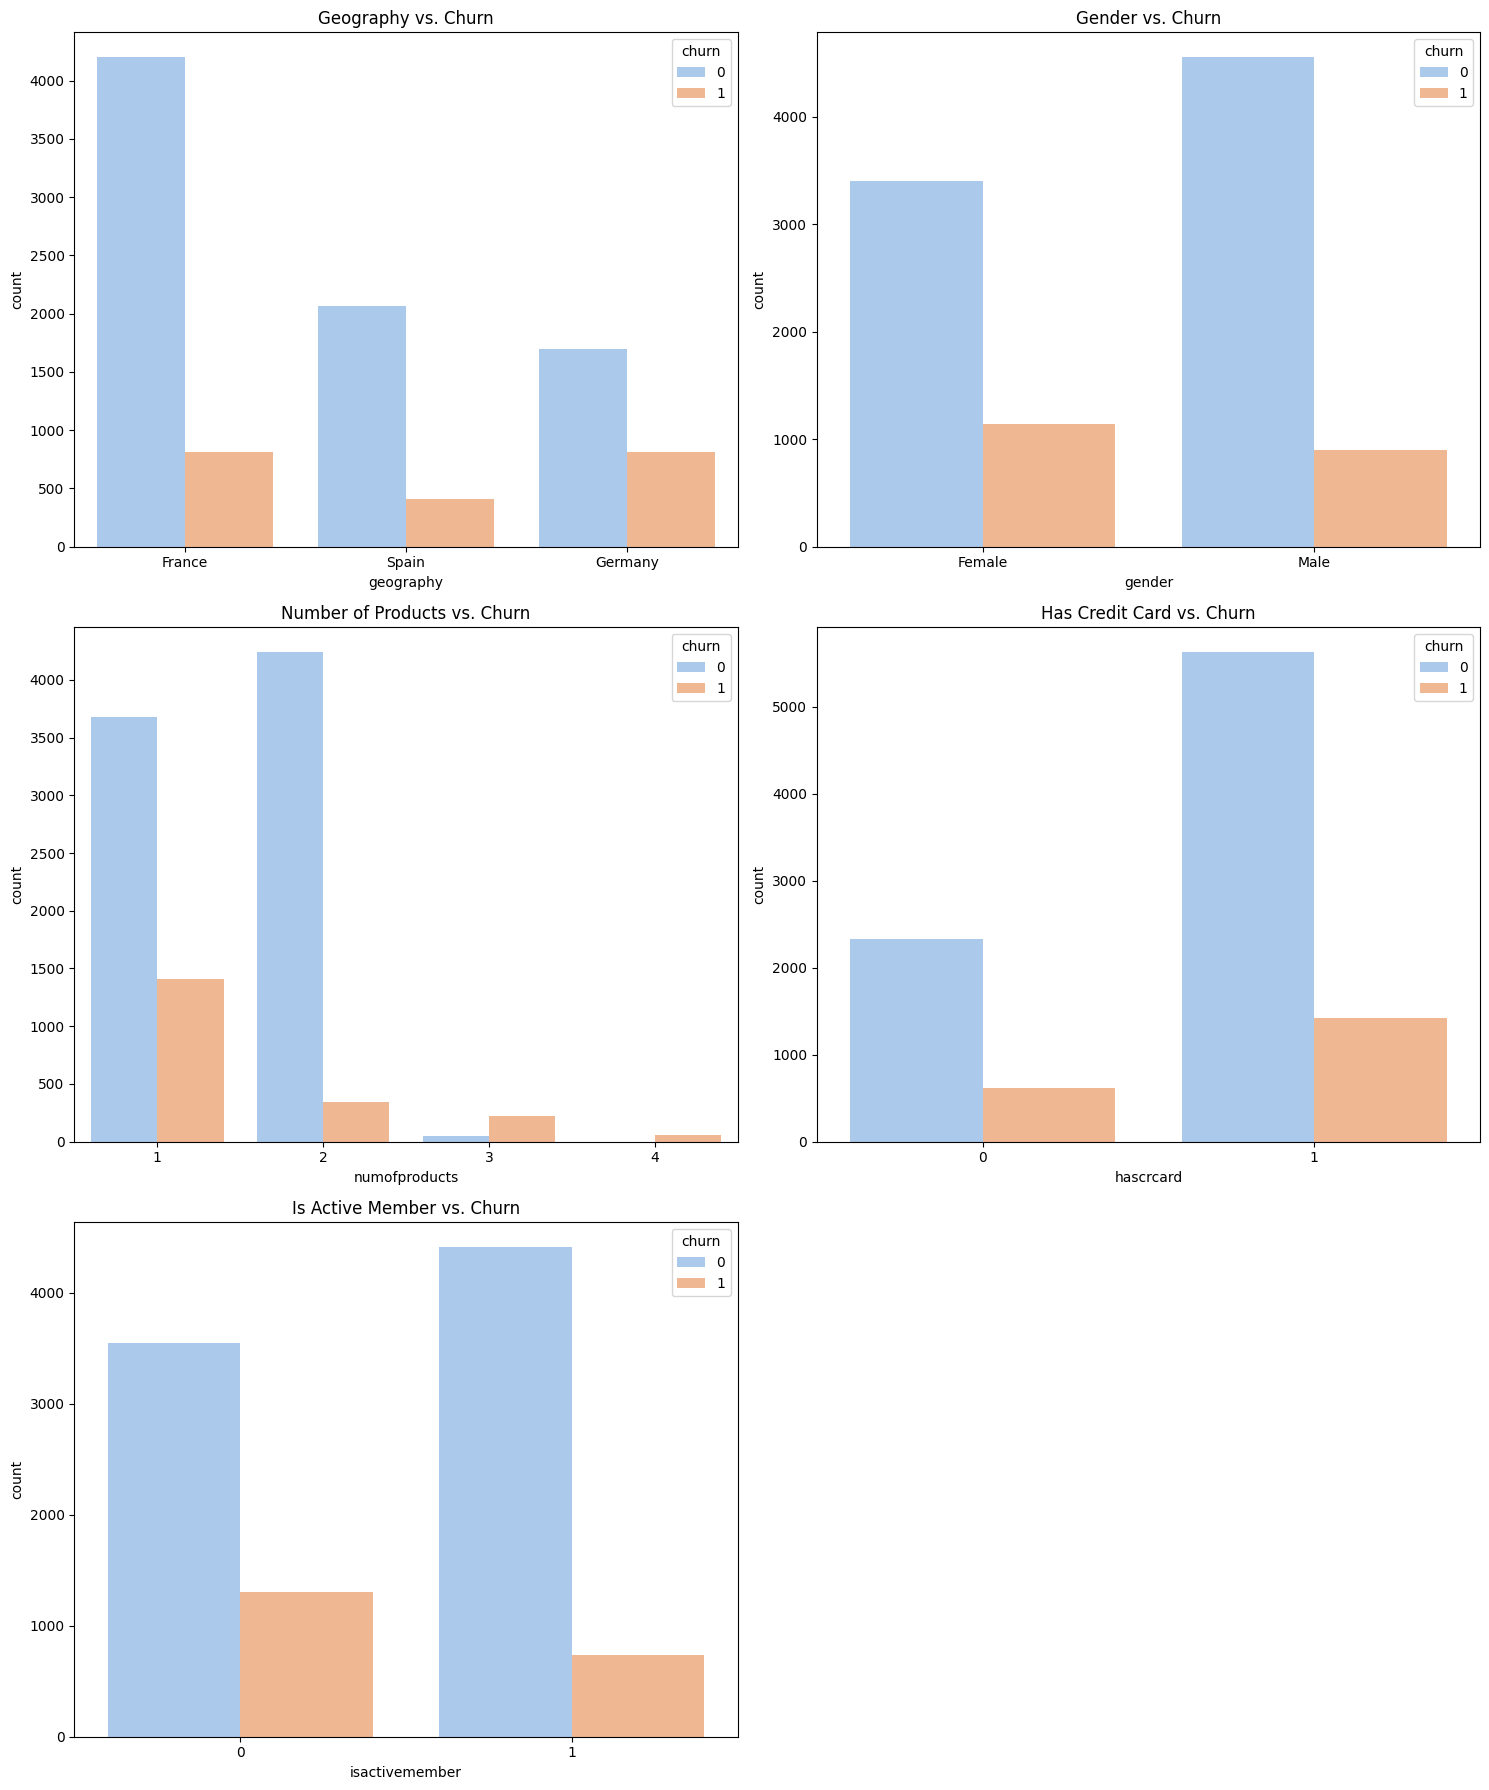

In [57]:
# Creating subplots in a 2-column layout
fig, axs = plt.subplots(3, 2, figsize=(15, 18))

# Geography vs. Churn
sns.countplot(x='geography', hue='churn', data=df, ax=axs[0, 0], palette='pastel')
axs[0, 0].set_title('Geography vs. Churn')

# Gender vs. Churn
sns.countplot(x='gender', hue='churn', data=df, ax=axs[0, 1], palette='pastel')
axs[0, 1].set_title('Gender vs. Churn')

# Number of Products vs. Churn
sns.countplot(x='numofproducts', hue='churn', data=df, ax=axs[1, 0], palette='pastel')
axs[1, 0].set_title('Number of Products vs. Churn')

# Has Credit Card vs. Churn
sns.countplot(x='hascrcard', hue='churn', data=df, ax=axs[1, 1], palette='pastel')
axs[1, 1].set_title('Has Credit Card vs. Churn')

# Is Active Member vs. Churn
sns.countplot(x='isactivemember', hue='churn', data=df, ax=axs[2, 0], palette='pastel')
axs[2, 0].set_title('Is Active Member vs. Churn')

# Removing the empty subplot (bottom right)
fig.delaxes(axs[2, 1])

# Display the plots
plt.tight_layout()
plt.show()

In [58]:
df.groupby('hascrcard')['churn'].mean()

hascrcard
0    0.208149
1    0.201843
Name: churn, dtype: float64

In [59]:
df.groupby('isactivemember')['churn'].mean()

isactivemember
0    0.268509
1    0.142691
Name: churn, dtype: float64

##### Geography vs. Churn
- **France**:
  - The churn rate in France appears to be relatively low compared to the number of non-churning customers.

- **Spain**:
  - The churn rate in Spain is relatively low, similar to France.

- **Germany**:
  - The churn rate in Germany is higher compared to France and Spain, suggesting potential issues that might be specific to the German market.

##### Gender vs. Churn
- **Female**:
  - The churn rate among female customers is higher compared to male customers.

- **Male**:
  - The churn rate among male customers is lower compared to female customers.
  
##### Number of Products vs. Churn
- **1 Product**: Customers with 1 product have a higher churn rate compared to those with more products. This suggests that having only one product may not be enough to retain customers.
- **2 Products**: The majority of customers have 2 products, and they exhibit a lower churn rate compared to those with only 1 product.
- **3 and 4 Products**: Very few customers have 3 or 4 products, and the churn rates for these groups are not significant enough to draw conclusions. However, customers with more products tend to churn more, even all of the customers that have 4 products, all churned.

##### Has Credit Card vs. Churn
- **No Credit Card and Has Credit Card**: Customers without a credit card and with a credit card have a similar churn rate.

##### Is Active Member vs. Churn
- **Inactive Members**: Inactive members have a significantly higher churn rate compared to active members.
- **Active Members**: Active members show a much lower churn rate, indicating that customer engagement plays a crucial role in reducing churn.



These insights suggest that geographical differences and gender may influence customer churn rates. Germany shows a higher churn rate, which may warrant further investigation into regional factors. Additionally, female customers seem to have a higher churn rate compared to male customers, indicating a need for targeted strategies to improve retention among female customers. Furthermore, these insights suggest that increasing the number of products a customer has, ensuring they have a credit card, and maintaining their engagement as active members are important strategies for reducing churn.


# Data Preparation

In [60]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [61]:
from sklearn.model_selection import train_test_split

# Split the data first
X = df.drop('churn', axis=1)
y = df['churn']

X_train, X_fullval, y_train, y_fullval = train_test_split(X,y,random_state=44,test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_fullval,y_fullval, random_state=44,test_size=0.5)

In [62]:
# Reset the index for each DataFrame
X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Verify the shapes of the splits
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (7000, 10) (7000,)
Validation set: (1500, 10) (1500,)
Test set: (1500, 10) (1500,)


We aim to prepare the data by scaling all numeric columns and one-hot encoding categorical columns. This process will be integrated into a single pipeline.

In [63]:
# Define the columns
numerical = ['creditscore', 'age', 'tenure', 'balance', 'estimatedsalary', 'numofproducts', 'hascrcard', 'isactivemember']
categorical = ['geography', 'gender']

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical),
        ('cat', OneHotEncoder(drop='first'), categorical)
    ])

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Fit the pipeline on the training data and transform
X_train_preprocessed = pipeline.fit_transform(X_train)

# Transform the validation and test data
X_val_preprocessed = pipeline.transform(X_val)
X_test_preprocessed = pipeline.transform(X_test)

# Convert the transformed training data back to a DataFrame
feature_names = (pipeline.named_steps['preprocessor'].named_transformers_['cat']
                 .get_feature_names_out(['geography', 'gender']))

all_features = numerical + feature_names.tolist()

X_train_final = pd.DataFrame(X_train_preprocessed, columns=all_features)
X_val_final = pd.DataFrame(X_val_preprocessed, columns=all_features)
X_test_final = pd.DataFrame(X_test_preprocessed, columns=all_features)

### Further Analysis

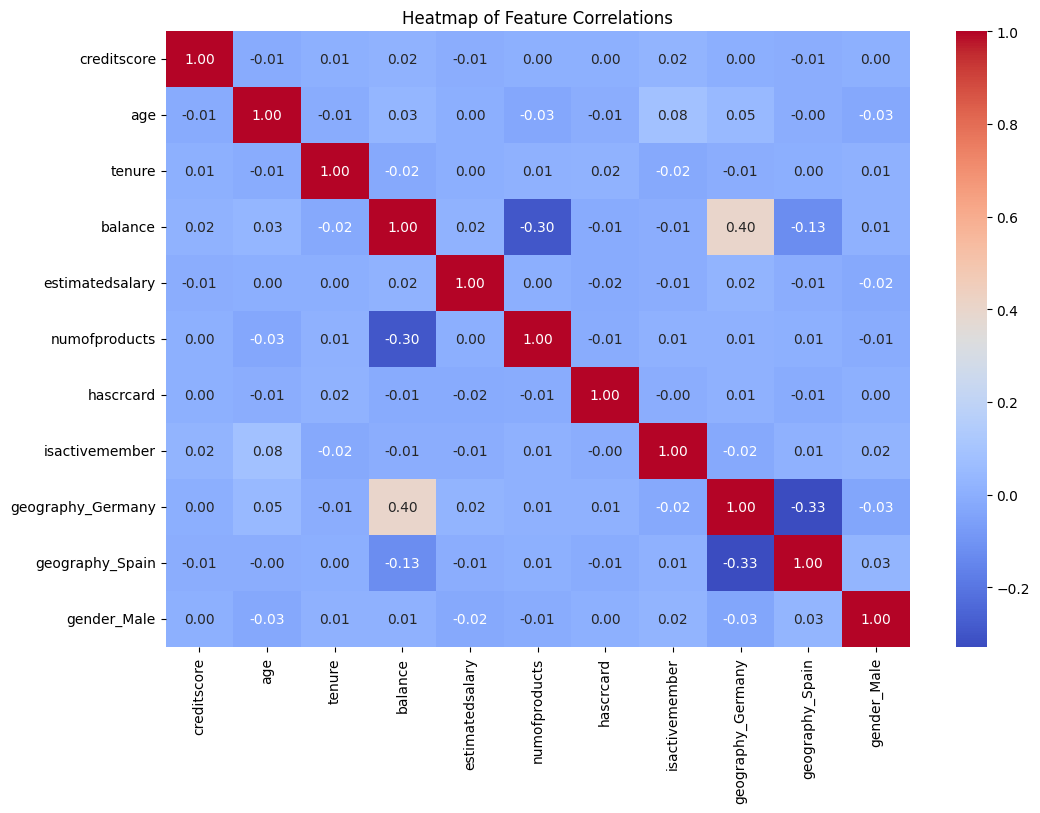

In [64]:
# Display the heatmap of the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(X_train_final.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Feature Correlations')
plt.show()

### Summary

Overall, the heatmap indicates that most features have very weak correlations with each other. The most notable correlations are:
- Moderate positive correlation between `balance` and `numofproducts` (0.40).
- Moderate negative correlation between `numofproducts` and `balance` (-0.30).
- Moderate positive correlation between `geography_Germany` and `balance` (0.40).
- Moderate negative correlation between `geography_Germany` and `geography_Spain` (-0.33).

These insights suggest that most features in this dataset are relatively independent of each other.

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
X_vif = X_train_final.copy()
X_vif['intercept'] = 1  # Adding intercept for VIF calculation
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif_data = vif_data.drop(vif_data[vif_data['Feature'] == 'intercept'].index)  # Drop the intercept VIF

print(vif_data)

              Feature       VIF
0         creditscore  1.001134
1                 age  1.011609
2              tenure  1.001353
3             balance  1.340448
4     estimatedsalary  1.001326
5       numofproducts  1.122786
6           hascrcard  1.001455
7      isactivemember  1.008974
8   geography_Germany  1.350621
9     geography_Spain  1.122600
10        gender_Male  1.003989


All features exhibit VIF values close to 1, indicating very low multicollinearity among them. This suggests that the features are largely independent of each other, and multicollinearity is not a significant concern in this dataset. The highest VIF values are for `balance` (1.336461) and `geography_Germany` (1.339719), but these are still well below any thresholds that would indicate problematic multicollinearity.

# Modeling & Evaluation

### Evaluation Metrics Selection for Churn Prediction

#### 1. F-beta Score (F1.5 Score)

**Reason for Selection:**
- **Imbalanced Data:** Accuracy is misleading for imbalanced datasets.
- **Recall Emphasis:** Identifying all churning customers is crucial.
- **Precision Consideration:** Reducing false positives is still important.

**F1.5 Score:**
- A weighted harmonic mean of precision and recall, with more emphasis on recall.

#### 2. ROC AUC Score

**Reason for Selection:**
- **Threshold Independence:** Evaluates model performance across all classification thresholds.
- **True Positive and False Positive Rates:** Considers both recall and the false positive rate.
- **Probability Scores:** Measures the ranking quality of predicted probabilities.

**Suitability for Churn Prediction:**
- **Business Impact:** High ROC AUC ensures effective distinction between churn and non-churn customers.
- **Decision-Making:** Allows selection of optimal threshold balancing false positives and false negatives.

In [81]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer, roc_auc_score, classification_report

In [67]:
def evaluate_model(y_actual, y_prob, beta=1.5):
    # Convert probabilities to binary predictions
    y_pred = (y_prob >= 0.5).astype(int)

    # Evaluate the model
    fbeta = fbeta_score(y_actual, y_pred, beta=beta)
    roc_auc = roc_auc_score(y_actual, y_prob)
    report = classification_report(y_actual, y_pred, output_dict=True)

    return {
        'F1.5 Score': fbeta,
        'ROC AUC Score': roc_auc,
    }

To ensure a comprehensive evaluation, we have selected a diverse set of machine learning models, including both linear and ensemble methods. The models chosen for this comparison are:

- Logistic Regression with L2 Regularization: A linear model that uses L2 regularization (also known as Ridge regression) to prevent overfitting by penalizing large coefficients.

- Logistic Regression with L1 Regularization: A linear model that uses L1 regularization (also known as Lasso regression) to enforce sparsity, effectively selecting a subset of the most relevant features.

- AdaBoost Classifier: An ensemble model that combines multiple weak learners (usually decision stumps) to create a strong classifier through adaptive boosting.

- Random Forest Classifier: An ensemble model that builds multiple decision trees and merges them to get a more accurate and stable prediction.

- XGBoost Classifier: An optimized gradient boosting algorithm that implements machine learning algorithms under the Gradient Boosting framework.

- CatBoost Classifier: An implementation of gradient boosting on decision trees that handles categorical features automatically and efficiently.

- LightGBM Classifier: A highly efficient gradient boosting framework that uses tree-based learning algorithms. It is designed to be distributed and efficient with higher speed and lower memory usage.

In [77]:
# Define the models to evaluate
models = {
    'Logistic Regression L2': LogisticRegression(penalty='l2', solver='liblinear'),
    'Logistic Regression L1': LogisticRegression(penalty='l1', solver='liblinear'),
    'AdaBoost': AdaBoostClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'CatBoost': CatBoostClassifier(silent=True),
    'LightGBM': LGBMClassifier(verbose=-1)
}

# Initialize a DataFrame to store the results
results_val = []
results_test = []

for name, model in models.items():
    # Fit the model
    model.fit(X_train_final, y_train)

    # Predict probabilities for validation and test sets
    y_val_prob = model.predict_proba(X_val_final)[:, 1]
    y_test_prob = model.predict_proba(X_test_final)[:, 1]

    # Evaluate the model
    val_metrics = evaluate_model(y_val, y_val_prob)
    test_metrics = evaluate_model(y_test, y_test_prob)

    results_val.append([name, 'Validation'] + list(val_metrics.values()))
    results_test.append([name, 'Test'] + list(test_metrics.values()))

# Create a DataFrame to display the results
results_val_df = pd.DataFrame(results_val, columns=['Model', 'Dataset', 'F1.5 Score', 'ROC AUC Score'])
results_test_df = pd.DataFrame(results_test, columns=['Model', 'Dataset', 'F1.5 Score', 'ROC AUC Score'])

In [78]:
results_val_df

,Model,Dataset,F1.5 Score,ROC AUC Score
0,Logistic Regression L2,Validation,0.260081,0.763102
1,Logistic Regression L1,Validation,0.260081,0.763148
2,AdaBoost,Validation,0.545923,0.843043
3,Random Forest,Validation,0.550096,0.845725
4,XGBoost,Validation,0.545308,0.836646
5,CatBoost,Validation,0.549599,0.861736
6,LightGBM,Validation,0.555795,0.858726


In [79]:
results_test_df

,Model,Dataset,F1.5 Score,ROC AUC Score
0,Logistic Regression L2,Test,0.263291,0.770006
1,Logistic Regression L1,Test,0.259506,0.770022
2,AdaBoost,Test,0.572464,0.864528
3,Random Forest,Test,0.555333,0.866094
4,XGBoost,Test,0.583425,0.862892
5,CatBoost,Test,0.597534,0.885172
6,LightGBM,Test,0.597826,0.873597


After evaluating multiple models based on their F-beta score (with a beta value of 1.5) and ROC AUC score, we have identified that the LightGBM model performs the best in predicting customer churn. The LightGBM model achieved the highest F1.5 score and ROC AUC score on both the validation and test datasets, indicating its superior performance in identifying potential churners while balancing precision and recall effectively. Now, we will try to hyperparameter tuning to get a better model

### Hyperparameter Tuning

In [83]:
# Define the LightGBM model
lgbm = LGBMClassifier(verbose=-1)

# Define the parameter grid for GridSearchCV
param_grid = {
    'num_leaves': [31, 50],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200]
}

# Define the custom scorer for F1.5 score
fbeta_scorer = make_scorer(fbeta_score, beta=1.5)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, scoring=fbeta_scorer, cv=5)

# Fit the GridSearchCV object
grid_search.fit(X_train_final, y_train)

[LightGBM] [Info] Number of positive: 1141, number of negative: 4459
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001433 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 859
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203750 -> initscore=-1.363019
[LightGBM] [Info] Start training from score -1.363019
[LightGBM] [Info] Number of positive: 1141, number of negative: 4459
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001291 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 858
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203750 -> initscore=-1.363019
[LightGBM] [Info] Start training from score -1.363019
[LightGBM] [Info] Nu

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 200], 'num_leaves': [31, 50]},
             scoring=make_scorer(fbeta_score, beta=1.5))

In [84]:
# Evaluate the best model on the validation set
y_val_prob = best_model.predict_proba(X_val_final)[:, 1]
print("Evaluating best LightGBM model on Validation Set:")
evaluate_model(y_val, y_val_prob)

NameError: name 'best_model' is not defined

In [ ]:
# Evaluate the best model on the test set
y_test_prob = best_model.predict_proba(X_test)[:, 1]
print("\nEvaluating best LightGBM model on Test Set:")
evaluate_model(y_test, y_test_prob)

Despite initial promising results, hyperparameter tuning for the LightGBM model resulted in worse performance, suggesting overfitting. Therefore, tuning did not improve the model as expected.

# Final Model

In [ ]:
# Evaluate LightGBM separately
# Define the LightGBM model
lgbm = LGBMClassifier(verbose=-1)
lgbm.fit(X_train_final, y_train)

In [ ]:
y_test_prob = lgbm.predict_proba(X_test_final)[:, 1]
y_pred = (y_test_prob >= 0.5).astype(int)
X_test['y_actual'] = y_test
X_test['y_pred'] = y_pred

In [ ]:
X_test.to_csv('churn_predicted.csv',index_label=False)